In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

train=pd.read_csv("train.csv")
train['Gender']=train.Gender.map({'Male':0,'Female':1})
train['Vehicle_Age']=train.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Damage']=train.Vehicle_Damage.map({'No':0,'Yes':1})
print(train)
train.isnull().any()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
imputer=KNNImputer(n_neighbors=2)
a=imputer.fit_transform(train[['Driving_License']])
b=imputer.fit_transform(train[['Policy_Sales_Channel']])
train['Driving_License']=a
train['Policy_Sales_Channel']=b
#KNN算法填充缺失值
print(train)
corr=train.corr()
corr=(corr)
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

train.isnull().any()

In [ ]:
x=train.loc[:,'Age':'Vintage']
print(x)
y=train.loc[:,'Response']
print(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
#CLF=RandomForestClassifier(n_estimators=500,n_jobs=4)
#CLF=MLPClassifier(hidden_layer_sizes=(1000), max_iter=100)
#CLF=XGBClassifier(silent=0,learning_rate=0.01,max_depth=4,gamma = 0.1,n_estimators=1500)
def print_best_score(gsearch,param_test):
     # 输出best score
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")
    # 输出最佳的分类器到底使用了怎样的参数
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

param_test = {
    'max_depth': range(5,15,2),
    'num_leaves': range(10,40,5),
}
CLF=lgb.LGBMClassifier(n_jobs=-1,
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=1500)

gsearch = GridSearchCV( CLF , param_grid = param_test, scoring='roc_auc', cv=5 )
gsearch.fit( x_train, y_train )
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
print_best_score(gsearch,param_test)
#CLF.fit(x_train,y_train)

In [126]:
test=pd.read_csv("test.csv")
test['Gender']=test.Gender.map({'Male':0,'Female':1})
test['Vehicle_Age']=test.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Damage']=test.Vehicle_Damage.map({'No':0,'Yes':1})

In [127]:
test_imputer=KNNImputer(n_neighbors=2)
a=test_imputer.fit_transform(test[['Driving_License']])
b=test_imputer.fit_transform(test[['Policy_Sales_Channel']])
test['Driving_License']=a
test['Policy_Sales_Channel']=b

In [128]:
#x_test=test.loc[:,'Age':'Vintage']
np.set_printoptions(threshold=np.inf)

<Figure size 432x288 with 0 Axes>

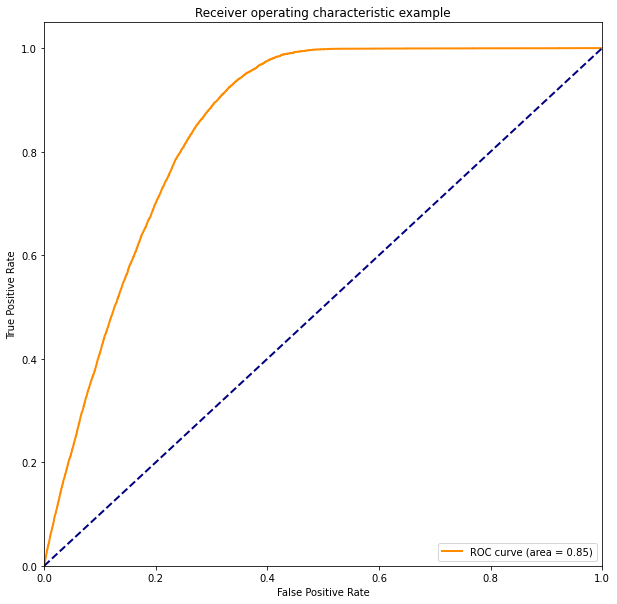

0.8515793818504546


In [133]:
a=CLF.predict_proba(x_test)
scores=a[:,1:2]
fpr,tpr,threshold = roc_curve(y_test, scores)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)